In [5]:
%load_ext autoreload
%autoreload 2
from rectangle import Rectangle
from environment import RectangleEnv
from optimizer import StepOptimizer
from algorithms import *
from models.agents import QLearningAgent, SarsaAgent
from models.trainer import Trainer
from generator2 import make_cases, build_envs_from_cases

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from sanity_tests import *
# from example_generator import make_cases, build_envs_from_cases
import numpy as np

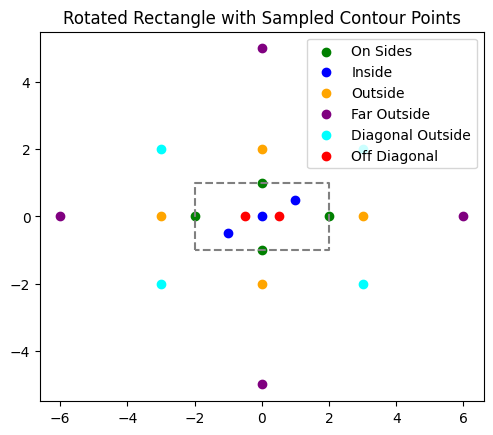

All tests passed!
Step 1: horizontal, shift=1.9999979347611103, used_iters=16
Step 2: vertical, shift=0.5000000088678954, used_iters=7


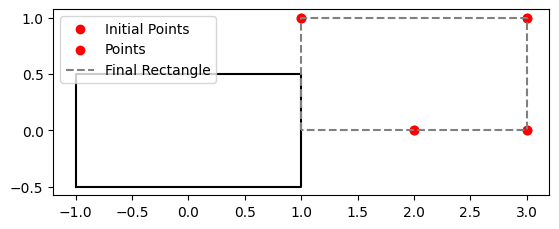


[check] encode_state invariants
Encoded state: (2, 0, 2, 0, 4, 0, 0)
 sides    (T,B,R,L):  2  0  2  0
 distances (touch,close,far):  4  0  0
  sum sides == N: True   sum bins == N: True

[check] axis isolation via apply_action()
  vertical: x unchanged? True | y changed? False
  horizontal: y unchanged? True | x changed? False

[run] short rollout using env.step()
 t        action  used   mean_before   mean_after    imprv     reward
------------------------------------------------------------------------
 0  ('horizontal', 2)     2      1.390388     0.447249   0.9431     0.5431
      expected: 0.7431  (set compute_reward(alpha=1,beta=0.1) to match)
      invariants: sides_sum==N? True | bins_sum==N? True
 1  ('vertical', 2)     2      0.447249     0.128897   0.3184    99.9184
      expected: 0.1184  (set compute_reward(alpha=1,beta=0.1) to match)
      invariants: sides_sum==N? True | bins_sum==N? True
  -> done (terminal reached by touching-all or max_steps)

[check] terminal conditi

In [3]:
if __name__ == "__main__":
    # Run the sanity checks for the Rectangle class
    test_rectangle_distance()
    # Run the sanity checks for the RectangleEnv
    sanity_check_step_optimizer()

    env = build_env()
    env.render()

    # 1) state invariants on reset
    env.reset()
    check_encode_state_invariants(env)

    # 2) axis isolation (uses apply_action only)
    check_axis_isolation(env)

    # 3) rollout that prints distances, rewards, and invariants
    rollout_and_print(env, steps=20)

    # 4) terminal checks
    check_terminal_conditions(env)

    print("\n[done] If something looks off (e.g., reward != expected), tweak compute_reward or the alpha/beta used.")

In [10]:
# rect_params = dict(center=(0, 0), width=2.0, height=1.0, theta=np.pi/6)
# optimizer_params = dict(tau=0.1, loss="soft_l1", bounds=(-5, 5))
# offsetX, offsetY = np.random.uniform(-2, 3), np.random.uniform(-2, 3)
# rect = Rectangle(**rect_params)
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# rect.plot(ax=ax, color='blue', alpha=0.5)
# rect.move(dx=offsetX, dy=offsetY)
# points = rect.sample_points(num_points=10, jitter=0.0, rng=np.random.default_rng(42)) 
# ax.scatter(points[:, 0], points[:, 1], color='red', label='Sampled Points')
# env = RectangleEnv(rect_params=rect_params, optimizer_params=optimizer_params, points=points)

In [69]:
def run_algo(algo_name, example_name, env = RectangleEnv, episodes=500, **kwargs):
    """
    Convenience function to run an algorithm on the given environment.
    """
    if algo_name == 'sarsa':
        Q, logs, N = train_sarsa(env, episodes=episodes, **kwargs)
    elif algo_name == 'q':
        Q, logs, N = train_q_learning(env, episodes=episodes, **kwargs)
    else:
        raise ValueError(f"Unknown algorithm: {algo_name}")
    metrics = run_episode(env, Q, N, render=True)
    display(env.log)
    print("greedy eval:", metrics)
    env.show_gif(filename=f"gifs_{algo_name}/{example_name}_animation.gif")
    return Q

In [7]:
params = {
    'episodes': 500,
    'alpha': 0.1,
    'gamma': 1,
    'eps_start': 0.2,
    'eps_end': 0.01,
    'eps_decay': 0.995,
    'seed': 0
}
rect_params = dict(center=(0, 0), width=2.0, height=1.0, theta=np.pi/6)
optimizer_params = dict(tau=0.1, loss="soft_l1", bounds=(-5, 5))

# cases = make_cases(rect_params, optimizer_params, num_points=20, jitter=0.01)
# envs  = build_envs_from_cases(cases)
cases = make_cases(rect_params, optimizer_params, num_points=20, jitter_t = 0.05, jitter_n=0.01, rng=np.random.default_rng(42))
envs  = build_envs_from_cases(cases)

In [8]:
envs

{'offset_0.0_0.0_rot_0': <environment.RectangleEnv at 0x715389c5a390>,
 'offset_0.0_0.0_rot_30': <environment.RectangleEnv at 0x7153b5b943e0>,
 'offset_0.0_0.0_rot_45': <environment.RectangleEnv at 0x71538a8b4500>,
 'offset_0.0_0.0_rot_-45': <environment.RectangleEnv at 0x715389b50710>,
 'offset_0.0_0.0_rot_90': <environment.RectangleEnv at 0x715389b508f0>,
 'offset_1.5_0.0_rot_0': <environment.RectangleEnv at 0x715389b52ed0>,
 'offset_1.5_0.0_rot_30': <environment.RectangleEnv at 0x715389b505f0>,
 'offset_1.5_0.0_rot_45': <environment.RectangleEnv at 0x715389b526f0>,
 'offset_1.5_0.0_rot_-45': <environment.RectangleEnv at 0x715389b52930>,
 'offset_1.5_0.0_rot_90': <environment.RectangleEnv at 0x715389b52cf0>,
 'offset_-1.2_-0.8_rot_0': <environment.RectangleEnv at 0x715389b532f0>,
 'offset_-1.2_-0.8_rot_30': <environment.RectangleEnv at 0x715389b53500>,
 'offset_-1.2_-0.8_rot_45': <environment.RectangleEnv at 0x715389b536e0>,
 'offset_-1.2_-0.8_rot_-45': <environment.RectangleEnv at 0

In [9]:
subset = dict(list(envs.items())[-15:-5])  
subset

{'offset_-1.2_-0.8_rot_0': <environment.RectangleEnv at 0x715389b532f0>,
 'offset_-1.2_-0.8_rot_30': <environment.RectangleEnv at 0x715389b53500>,
 'offset_-1.2_-0.8_rot_45': <environment.RectangleEnv at 0x715389b536e0>,
 'offset_-1.2_-0.8_rot_-45': <environment.RectangleEnv at 0x715389b53110>,
 'offset_-1.2_-0.8_rot_90': <environment.RectangleEnv at 0x715389b53c50>,
 'offset_2.0_1.0_rot_0': <environment.RectangleEnv at 0x715389b53d40>,
 'offset_2.0_1.0_rot_30': <environment.RectangleEnv at 0x715389b53f80>,
 'offset_2.0_1.0_rot_45': <environment.RectangleEnv at 0x71538a21faa0>,
 'offset_2.0_1.0_rot_-45': <environment.RectangleEnv at 0x715389aefd10>,
 'offset_2.0_1.0_rot_90': <environment.RectangleEnv at 0x715389aecaa0>}

In [20]:
q_agent = QLearningAgent(nA = 18)
trainer = Trainer(envs=subset, agent=q_agent)
trainer.train(episodes=2000)

In [21]:
q_agent.Q[(4, 0, 0, 16, 20, 0, 0)]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01059032, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [25]:
name = list(subset.keys())[-5]
env = subset[name]
metrics = trainer.evaluation(env, episodes=1)
display(env.log)
display(metrics)

['State: (0, 0, 20, 0, 17, 3, 0)',
 "STEP 1 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 1.326785115383314, Old Dist: 1.2268",
 'State: (4, 5, 11, 0, 6, 13, 1)',
 'New Distance: 0.34627427019388146',
 "STEP 2 >>>>>> Action: ('horizontal', 6), Used: 6, Delta: 0.9051972100214517, Old Dist: 0.3463",
 'State: (7, 7, 3, 3, 0, 14, 6)',
 'New Distance: 0.09693828366871178',
 "STEP 3 >>>>>> Action: ('move', ('up', 0.2)), Delta: 0.2, Old Dist: 0.0969",
 'State: (5, 7, 4, 4, 0, 14, 6)',
 'New Distance: 0.24028341223456326',
 "STEP 4 >>>>>> Action: ('move', ('down', 0.5)), Delta: 0.5, Old Dist: 0.2403",
 'State: (7, 7, 3, 3, 0, 14, 6)',
 'New Distance: 0.11649130533632532',
 "STEP 5 >>>>>> Action: ('move', ('up', 0.2)), Delta: 0.2, Old Dist: 0.1165",
 'State: (7, 7, 3, 3, 0, 0, 20)',
 'New Distance: 0.026938283668711684']

[{'ep': 0,
  'reward': np.float64(8.99984572228631),
  'steps': 5,
  'optimizer_iters': 8}]

In [43]:
len(trainer.logs)

2000

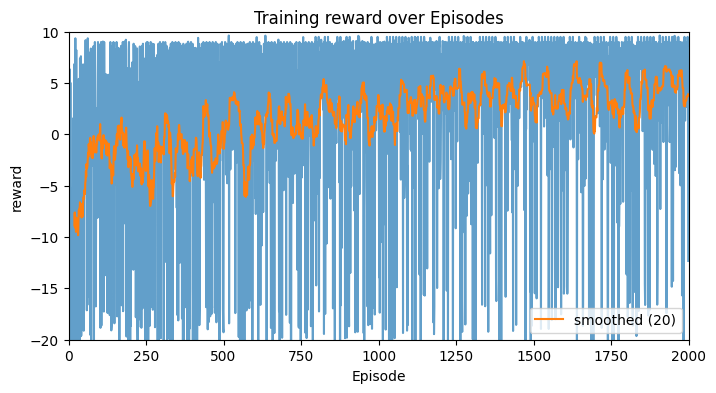

In [53]:
trainer.plot_training_logs(col_name="reward", smooth_window=20, xlim=(0, 2000), ylim=(-20, 10))

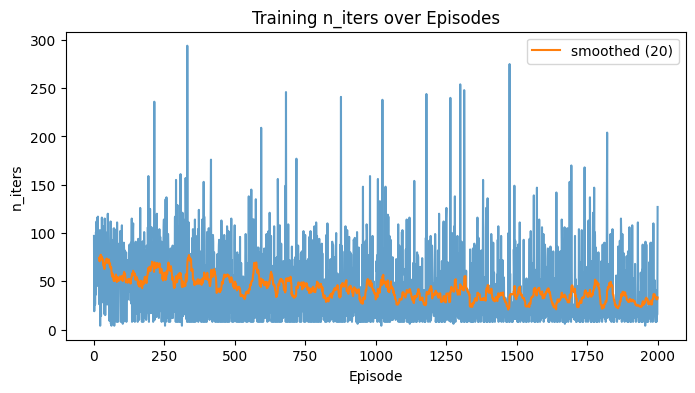

In [ ]:
trainer.plot_training_logs(col_name="n_iters", smooth_window=20, xlim=(0, 2000), ylim=(0, 200))

In [30]:
env.show_gif()

In [30]:
env.rectangle.get_sides()

{'left': (array([-2.78317432,  0.90302138]),
  array([-3.75104781,  1.15445909])),
 'top': (array([-3.75104781,  1.15445909]), array([-3.24817238,  3.09020605])),
 'right': (array([-3.24817238,  3.09020605]),
  array([-2.2802989 ,  2.83876834])),
 'bottom': (array([-2.2802989 ,  2.83876834]),
  array([-2.78317432,  0.90302138]))}

In [26]:
env.rectangle.get_local_directions()

(array([0.8660254, 0.5      ]), array([-0.5      ,  0.8660254]))

In [20]:
q_agent.Q[(4, 0, 0, 16, 20, 0, 0)]

array([37.83294628, 38.00440023, 15.06072982,  1.07378714,  1.32842611,
        1.26962703, 49.35759728, 51.71729356,  8.61792006,  5.91607942,
       55.35132513, 71.28579433,  8.80553404,  1.14295465,  2.03134668,
        1.48727095,  1.51021836,  2.04033587])

In [97]:
for name, env in list(envs.items()):
    print(f"-----------------{name}------------------")
    run_algo("sarsa", name,  env, **params)
    print(f"-----------------------------------------\n")

-----------------aligned------------------


['State: (13, 7, 0, 0, 12, 5, 3)',
 "STEP 1 >>>>>> Action: ('rotate', 9), Used: 9, Delta: -1.554027872172134, Old Dist: 0.3707",
 'State: (5, 5, 2, 8, 0, 0, 20)',
 'New Distance: 0.009366022171004964']

greedy eval: {'return': np.float64(99.76135038826645), 'steps': 1, 'iters': 3, 'solved': True, 'final_mean_dist': 0.009366022171004964}
-----------------------------------------

-----------------right_1p5------------------


['State: (0, 6, 14, 0, 17, 3, 0)',
 "STEP 1 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 1.2292590955551022, Old Dist: 0.8353",
 'State: (6, 6, 7, 1, 1, 16, 3)',
 'New Distance: 0.1928563358951251',
 "STEP 2 >>>>>> Action: ('rotate', 6), Used: 6, Delta: 0.3747054211824863, Old Dist: 0.1929",
 'State: (5, 5, 8, 2, 0, 17, 3)',
 'New Distance: 0.15850542467235565',
 "STEP 3 >>>>>> Action: ('horizontal', 4), Used: 4, Delta: 0.2511575665889433, Old Dist: 0.1585",
 'State: (6, 2, 7, 5, 0, 2, 18)',
 'New Distance: 0.04342086080513717',
 "STEP 4 >>>>>> Action: ('rotate', 3), Used: 3, Delta: 0.13284553592064957, Old Dist: 0.0434",
 'State: (6, 4, 5, 5, 0, 0, 20)',
 'New Distance: 0.011818481258099676']

greedy eval: {'return': np.float64(99.02345747678737), 'steps': 4, 'iters': 9, 'solved': True, 'final_mean_dist': 0.011818481258099676}
-----------------------------------------

-----------------left_down_-1p2_-0p8------------------


['State: (3, 0, 0, 17, 9, 8, 3)',
 "STEP 1 >>>>>> Action: ('move', ('down', 0.2)), Delta: 0.2, Old Dist: 0.5060",
 'State: (6, 0, 0, 14, 9, 8, 3)',
 'New Distance: 0.4802771997244301',
 "STEP 2 >>>>>> Action: ('move', 'rotate'), Delta: 0.7853981633974483, Old Dist: 0.4803",
 'State: (14, 0, 0, 6, 11, 2, 7)',
 'New Distance: 0.5196546373654506',
 "STEP 3 >>>>>> Action: ('horizontal', 6), Used: 6, Delta: -1.0872730864154936, Old Dist: 0.5197",
 'State: (5, 11, 0, 4, 6, 0, 14)',
 'New Distance: 0.20002503107422406',
 "STEP 4 >>>>>> Action: ('move', ('down', 0.5)), Delta: 0.5, Old Dist: 0.2000",
 'State: (5, 8, 3, 4, 0, 8, 12)',
 'New Distance: 0.09893945449872285',
 "STEP 5 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: -0.10180080323267493, Old Dist: 0.0989",
 'State: (5, 8, 3, 4, 0, 3, 17)',
 'New Distance: 0.04292321303498582',
 "STEP 6 >>>>>> Action: ('move', ('up', 0.2)), Delta: 0.2, Old Dist: 0.0429",
 'State: (5, 9, 2, 4, 0, 6, 14)',
 'New Distance: 0.13198046230436072',
 "STEP 

greedy eval: {'return': np.float64(97.29529729553633), 'steps': 7, 'iters': 12, 'solved': True, 'final_mean_dist': 0.010752600431829993}
-----------------------------------------

-----------------wide_offset_1p0_0p5------------------


['State: (9, 5, 6, 0, 13, 5, 2)',
 "STEP 1 >>>>>> Action: ('move', ('up', 0.5)), Delta: 0.5, Old Dist: 0.5566",
 'State: (8, 5, 7, 0, 10, 8, 2)',
 'New Distance: 0.5824786347176018',
 "STEP 2 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 0.7096315117284686, Old Dist: 0.5825",
 'State: (9, 11, 0, 0, 10, 6, 4)',
 'New Distance: 0.47097897934773936',
 "STEP 3 >>>>>> Action: ('rotate', 9), Used: 9, Delta: -0.7714385674466882, Old Dist: 0.4710",
 'State: (6, 6, 6, 2, 0, 9, 11)',
 'New Distance: 0.14738925399116348',
 "STEP 4 >>>>>> Action: ('horizontal', 4), Used: 4, Delta: 0.2868971453435303, Old Dist: 0.1474",
 'State: (5, 7, 4, 4, 0, 0, 20)',
 'New Distance: 0.013739868459242206']

greedy eval: {'return': np.float64(98.54287706345652), 'steps': 4, 'iters': 9, 'solved': True, 'final_mean_dist': 0.013739868459242206}
-----------------------------------------

-----------------tall_offset_-0p5_1p2------------------


['State: (14, 0, 4, 2, 16, 3, 1)',
 "STEP 1 >>>>>> Action: ('vertical', 2), Used: 2, Delta: 1.028380748510888, Old Dist: 0.8191",
 'State: (7, 4, 4, 5, 8, 11, 1)',
 'New Distance: 0.3714510738139777',
 "STEP 2 >>>>>> Action: ('move', ('left', 0.5)), Delta: 0.5, Old Dist: 0.3715",
 'State: (8, 3, 5, 4, 3, 10, 7)',
 'New Distance: 0.19028347179625707',
 "STEP 3 >>>>>> Action: ('vertical', 2), Used: 2, Delta: 0.12600212056341317, Old Dist: 0.1903",
 'State: (7, 4, 4, 5, 0, 15, 5)',
 'New Distance: 0.17608777160388053',
 "STEP 4 >>>>>> Action: ('rotate', 9), Used: 7, Delta: 0.5191318550987284, Old Dist: 0.1761",
 'State: (6, 5, 6, 3, 0, 0, 20)',
 'New Distance: 0.030364093606191477']

greedy eval: {'return': np.float64(99.32208127084463), 'steps': 4, 'iters': 6, 'solved': True, 'final_mean_dist': 0.030364093606191477}
-----------------------------------------

-----------------rot_-60_offset_8_-6------------------


['State: (20, 0, 0, 0, 20, 0, 0)',
 "STEP 1 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 2.23606797749979, Old Dist: 9.0914",
 'State: (20, 0, 0, 0, 20, 0, 0)',
 'New Distance: 7.484880457276901',
 "STEP 2 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 2.23606797749979, Old Dist: 7.4849",
 'State: (3, 0, 17, 0, 20, 0, 0)',
 'New Distance: 6.23187036561686',
 "STEP 3 >>>>>> Action: ('vertical', 4), Used: 4, Delta: -4.99990124803803, Old Dist: 6.2319",
 'State: (20, 0, 0, 0, 20, 0, 0)',
 'New Distance: 2.7611476262966956',
 "STEP 4 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 2.23606797749979, Old Dist: 2.7611",
 'State: (7, 0, 13, 0, 15, 3, 2)',
 'New Distance: 0.9145054351814466',
 "STEP 5 >>>>>> Action: ('move', ('down', 0.5)), Delta: 0.5, Old Dist: 0.9145",
 'State: (14, 0, 6, 0, 15, 2, 3)',
 'New Distance: 0.7195770642833674',
 "STEP 6 >>>>>> Action: ('move', ('right', 0.5)), Delta: 0.5, Old Dist: 0.7196",
 'State: (10, 0, 10, 0, 13, 7, 0)',
 'New Distance: 0.5168717054

greedy eval: {'return': np.float64(104.88001127604196), 'steps': 12, 'iters': 15, 'solved': True, 'final_mean_dist': 0.011347774770875781}
-----------------------------------------

-----------------rot_30_offset_-4_3------------------


['State: (0, 0, 0, 20, 20, 0, 0)',
 "STEP 1 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: -2.23606797749979, Old Dist: 4.0738",
 'State: (20, 0, 0, 0, 20, 0, 0)',
 'New Distance: 2.8009332731758625',
 "STEP 2 >>>>>> Action: ('vertical', 6), Used: 6, Delta: 3.0953923086950423, Old Dist: 2.8009",
 'State: (0, 0, 0, 20, 14, 5, 1)',
 'New Distance: 0.8429637531954324',
 "STEP 3 >>>>>> Action: ('move', ('right', 0.5)), Delta: 0.5, Old Dist: 0.8430",
 'State: (0, 0, 0, 20, 20, 0, 0)',
 'New Distance: 1.2837245300717715',
 "STEP 4 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: -1.782157577296205, Old Dist: 1.2837",
 'State: (8, 9, 0, 3, 4, 12, 4)',
 'New Distance: 0.2840665079830892',
 "STEP 5 >>>>>> Action: ('move', ('left', 0.5)), Delta: 0.5, Old Dist: 0.2841",
 'State: (6, 14, 0, 0, 10, 7, 3)',
 'New Distance: 0.3684810790770851',
 "STEP 6 >>>>>> Action: ('rotate', 9), Used: 9, Delta: 1.5170845034211475, Old Dist: 0.3685",
 'State: (8, 5, 2, 5, 0, 3, 17)',
 'New Distance: 0.04706145

greedy eval: {'return': np.float64(100.04656160031927), 'steps': 7, 'iters': 18, 'solved': True, 'final_mean_dist': 0.027218827629377863}
-----------------------------------------



In [98]:
for name, env in envs.items():
    print(f"-----------------{name}------------------")
    run_algo("q", name, env, **params)
    print(f"-----------------------------------------\n")

-----------------aligned------------------


['State: (13, 7, 0, 0, 12, 5, 3)',
 "STEP 1 >>>>>> Action: ('rotate', 9), Used: 9, Delta: -1.554027872172134, Old Dist: 0.3707",
 'State: (5, 5, 2, 8, 0, 0, 20)',
 'New Distance: 0.009366022171004964']

greedy eval: {'return': np.float64(99.76135038826645), 'steps': 1, 'iters': 3, 'solved': True, 'final_mean_dist': 0.009366022171004964}
-----------------------------------------

-----------------right_1p5------------------


['State: (0, 6, 14, 0, 17, 3, 0)',
 "STEP 1 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 1.2292590955551022, Old Dist: 0.8353",
 'State: (6, 6, 7, 1, 1, 16, 3)',
 'New Distance: 0.1928563358951251',
 "STEP 2 >>>>>> Action: ('move', ('right', 0.5)), Delta: 0.5, Old Dist: 0.1929",
 'State: (9, 3, 3, 5, 2, 9, 9)',
 'New Distance: 0.16667239815949206',
 "STEP 3 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: -0.17997028270430213, Old Dist: 0.1667",
 'State: (7, 5, 5, 3, 0, 9, 11)',
 'New Distance: 0.121564717553816',
 "STEP 4 >>>>>> Action: ('rotate', 6), Used: 6, Delta: 0.5485701625294592, Old Dist: 0.1216",
 'State: (6, 4, 5, 5, 0, 0, 20)',
 'New Distance: 0.03080881267248649']

greedy eval: {'return': np.float64(99.40446714537299), 'steps': 4, 'iters': 6, 'solved': True, 'final_mean_dist': 0.03080881267248649}
-----------------------------------------

-----------------left_down_-1p2_-0p8------------------


['State: (3, 0, 0, 17, 9, 8, 3)',
 "STEP 1 >>>>>> Action: ('move', 'rotate'), Delta: 0.7853981633974483, Old Dist: 0.5060",
 'State: (10, 0, 0, 10, 11, 1, 8)',
 'New Distance: 0.5559600994249441',
 "STEP 2 >>>>>> Action: ('vertical', 2), Used: 2, Delta: -0.47216415265399625, Old Dist: 0.5560",
 'State: (16, 0, 0, 4, 11, 1, 8)',
 'New Distance: 0.5326775974534346',
 "STEP 3 >>>>>> Action: ('horizontal', 6), Used: 6, Delta: -0.5460537728900017, Old Dist: 0.5327",
 'State: (15, 0, 0, 5, 16, 2, 2)',
 'New Distance: 0.43013830338970627',
 "STEP 4 >>>>>> Action: ('move', ('left', 0.5)), Delta: 0.5, Old Dist: 0.4301",
 'State: (5, 9, 2, 4, 0, 7, 13)',
 'New Distance: 0.1590929680628736',
 "STEP 5 >>>>>> Action: ('move', ('down', 0.2)), Delta: 0.2, Old Dist: 0.1591",
 'State: (5, 8, 3, 4, 0, 20, 0)',
 'New Distance: 0.13328068085403416',
 "STEP 6 >>>>>> Action: ('horizontal', 4), Used: 4, Delta: -0.14617224464007053, Old Dist: 0.1333",
 'State: (5, 9, 2, 4, 0, 7, 13)',
 'New Distance: 0.056937

greedy eval: {'return': np.float64(97.26280276633486), 'steps': 7, 'iters': 12, 'solved': True, 'final_mean_dist': 0.04324712963330576}
-----------------------------------------

-----------------wide_offset_1p0_0p5------------------


['State: (9, 5, 6, 0, 13, 5, 2)',
 "STEP 1 >>>>>> Action: ('move', ('right', 0.5)), Delta: 0.5, Old Dist: 0.5566",
 'State: (10, 6, 4, 0, 13, 5, 2)',
 'New Distance: 0.500159915882443',
 "STEP 2 >>>>>> Action: ('move', ('up', 0.5)), Delta: 0.5, Old Dist: 0.5002",
 'State: (9, 9, 2, 0, 10, 9, 1)',
 'New Distance: 0.4834802088508803',
 "STEP 3 >>>>>> Action: ('move', ('right', 0.5)), Delta: 0.5, Old Dist: 0.4835",
 'State: (10, 10, 0, 0, 12, 5, 3)',
 'New Distance: 0.4864323382006823',
 "STEP 4 >>>>>> Action: ('vertical', 2), Used: 2, Delta: -0.020006205696765617, Old Dist: 0.4864",
 'State: (10, 10, 0, 0, 14, 4, 2)',
 'New Distance: 0.4881649264373559',
 "STEP 5 >>>>>> Action: ('rotate', 3), Used: 3, Delta: -0.6546337173391176, Old Dist: 0.4882",
 'State: (6, 8, 2, 4, 0, 7, 13)',
 'New Distance: 0.0802612912935439',
 "STEP 6 >>>>>> Action: ('rotate', 6), Used: 5, Delta: -0.13429549646136454, Old Dist: 0.0803",
 'State: (5, 7, 4, 4, 0, 0, 20)',
 'New Distance: 0.015025868788730176']

greedy eval: {'return': np.float64(99.0082577297937), 'steps': 6, 'iters': 4, 'solved': True, 'final_mean_dist': 0.015025868788730176}
-----------------------------------------

-----------------tall_offset_-0p5_1p2------------------


['State: (14, 0, 4, 2, 16, 3, 1)',
 "STEP 1 >>>>>> Action: ('move', ('up', 0.5)), Delta: 0.5, Old Dist: 0.8191",
 'State: (8, 3, 5, 4, 13, 7, 0)',
 'New Distance: 0.5742696106401728',
 "STEP 2 >>>>>> Action: ('move', ('up', 0.5)), Delta: 0.5, Old Dist: 0.5743",
 'State: (7, 4, 4, 5, 10, 8, 2)',
 'New Distance: 0.3793642481714036',
 "STEP 3 >>>>>> Action: ('move', ('left', 0.5)), Delta: 0.5, Old Dist: 0.3794",
 'State: (8, 3, 5, 4, 3, 11, 6)',
 'New Distance: 0.19416172516440705',
 "STEP 4 >>>>>> Action: ('vertical', 6), Used: 5, Delta: 0.22862927256615864, Old Dist: 0.1942",
 'State: (7, 4, 4, 5, 0, 16, 4)',
 'New Distance: 0.18010649848308402',
 "STEP 5 >>>>>> Action: ('rotate', 9), Used: 9, Delta: 0.5325019436192445, Old Dist: 0.1801",
 'State: (6, 5, 6, 3, 0, 0, 20)',
 'New Distance: 0.017891681176298142']

greedy eval: {'return': np.float64(98.60122034994119), 'steps': 5, 'iters': 8, 'solved': True, 'final_mean_dist': 0.017891681176298142}
-----------------------------------------

-----------------rot_-60_offset_8_-6------------------


['State: (20, 0, 0, 0, 20, 0, 0)',
 "STEP 1 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 2.23606797749979, Old Dist: 9.0914",
 'State: (20, 0, 0, 0, 20, 0, 0)',
 'New Distance: 7.484880457276901',
 "STEP 2 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 2.23606797749979, Old Dist: 7.4849",
 'State: (3, 0, 17, 0, 20, 0, 0)',
 'New Distance: 6.23187036561686',
 "STEP 3 >>>>>> Action: ('vertical', 2), Used: 2, Delta: -2.23606797749979, Old Dist: 6.2319",
 'State: (18, 0, 2, 0, 20, 0, 0)',
 'New Distance: 4.3523816602006065',
 "STEP 4 >>>>>> Action: ('vertical', 4), Used: 4, Delta: -2.895705841855176, Old Dist: 4.3524",
 'State: (20, 0, 0, 0, 20, 0, 0)',
 'New Distance: 2.73215876638264',
 "STEP 5 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: 2.23606797749979, Old Dist: 2.7322",
 'State: (9, 0, 11, 0, 14, 2, 4)',
 'New Distance: 0.8456544903759774',
 "STEP 6 >>>>>> Action: ('move', ('right', 0.5)), Delta: 0.5, Old Dist: 0.8457",
 'State: (5, 0, 15, 0, 14, 5, 1)',
 'New Distance:

greedy eval: {'return': np.float64(103.0827927488689), 'steps': 11, 'iters': 27, 'solved': True, 'final_mean_dist': 0.008566301943951202}
-----------------------------------------

-----------------rot_30_offset_-4_3------------------


['State: (0, 0, 0, 20, 20, 0, 0)',
 "STEP 1 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: -2.23606797749979, Old Dist: 4.0738",
 'State: (20, 0, 0, 0, 20, 0, 0)',
 'New Distance: 2.8009332731758625',
 "STEP 2 >>>>>> Action: ('rotate', 6), Used: 6, Delta: -1.1062737591988028, Old Dist: 2.8009",
 'State: (0, 0, 0, 20, 20, 0, 0)',
 'New Distance: 2.2275911054653603',
 "STEP 3 >>>>>> Action: ('horizontal', 2), Used: 2, Delta: -2.23606797749979, Old Dist: 2.2276",
 'State: (9, 0, 0, 11, 20, 0, 0)',
 'New Distance: 2.2029377500084433',
 "STEP 4 >>>>>> Action: ('move', ('up', 0.5)), Delta: 0.5, Old Dist: 2.2029",
 'State: (14, 0, 0, 6, 20, 0, 0)',
 'New Distance: 1.764037309458353',
 "STEP 5 >>>>>> Action: ('vertical', 4), Used: 4, Delta: 2.509484746817969, Old Dist: 1.7640",
 'State: (8, 7, 5, 0, 3, 12, 5)',
 'New Distance: 0.2363906671596358',
 "STEP 6 >>>>>> Action: ('move', ('right', 0.5)), Delta: 0.5, Old Dist: 0.2364",
 'State: (6, 9, 2, 3, 0, 10, 10)',
 'New Distance: 0.13972982154

greedy eval: {'return': np.float64(99.45040370217839), 'steps': 11, 'iters': 19, 'solved': True, 'final_mean_dist': 0.023376725770231734}
-----------------------------------------



In [102]:
env.rectangle.theta

-1.0310294520747032

In [99]:
Q

defaultdict(<function algorithms.train_sarsa.<locals>.<lambda>()>,
            {(0,
              0,
              0,
              20,
              20,
              0,
              0): array([ 3.15677738e-01, -8.69436255e-02,  5.42717640e+00,  8.97525818e+01,
                     4.64832614e+00,  2.50752318e+00,  2.74712134e-01,  5.91564584e-02,
                     3.25798948e-02,  1.16561453e+01,  5.84075774e+00,  3.95303737e+00,
                     1.58094078e+00,  6.02123395e+00,  4.59405062e+00,  1.39678309e+01,
                    -3.14959592e-02,  1.92288708e+00]),
             (8,
              0,
              0,
              12,
              16,
              2,
              2): array([ 0.        ,  0.        ,  0.        ,  0.        , -0.01548664,
                    -0.10647375,  0.        ,  0.        , -0.00722595,  0.        ,
                     0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
                     0.        ,  0.        ,  0.056

In [4]:
# from algorithms import train_sarsa, train_q_learning, run_episode
# # Train SARSA
Q, logs = train_sarsa(env, episodes=500, alpha=0.1, gamma=1,
                      eps_start=0.2, eps_end=0.01, eps_decay=0.995, seed=0)
# Q, logs = train_q_learning(env, episodes=400, alpha=0.1, gamma=1,
#                       eps_start=0.2, eps_end=0.01, eps_decay=0.995, seed=0)

# Inspect a few metrics
print("last 5 episode returns:", [d['return'] for d in logs[-5:]])
print("last 5 iters used:    ", [d['iters']  for d in logs[-5:]])
print("success ratio:", sum(d['solved'] for d in logs[-50:]), "/ last 50")

# Evaluate/render one greedy episode and get the total optimizer iterations used
metrics = run_episode(env, Q, render=True)
print("greedy eval:", metrics)

In [ ]:
# generate a super long code to check the Fformater works
c = [[[1 for i in range(5)] for i in range(5)] for i in range(5)]


In [ ]:
{"left": (c[0], c[1]), "top": (c[1], c[2]), "right": (c[2], c[3]), "bottom": (c[3], c[0]),}

In [ ]:
# messy_format_test.py


def add_numbers(x, y):
    return x + y


class Foo(object):
    def __init__(self, value):
        self.value = value

    def double(self):
        return 2 * self.value